In [1]:
import pandas as pd #Manejo de dataframes
import numpy as np #Manejo de listas
import matplotlib.pyplot as plt #Graficación
import seaborn as sns #Graficación

Importar los datos

In [2]:
df = pd.read_csv('mineducChile.csv')
df.head()

REGION  RURAL TIPO_ENSE  EDAD_ALU  PROM_GRAL  ASISTENCIA SITUACION_FINAL
0       9      0    BASICA         8        7.0         100               P
1      13      0  MEDIA_CH        16        6.7         100               P
2      15      0  MEDIA_CH        17        6.5          90               P
3       9      1    BASICA         9        6.4         100               P
4      13      0    BASICA        13        5.6          79               P

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REGION           987653 non-null  int64  
 1   RURAL            987653 non-null  int64  
 2   TIPO_ENSE        987653 non-null  object 
 3   EDAD_ALU         987653 non-null  int64  
 4   PROM_GRAL        987653 non-null  float64
 5   ASISTENCIA       987653 non-null  int64  
 6   SITUACION_FINAL  987653 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 52.7+ MB


Se realiza el cambio de tipo de REGION debido a que es una variable categorica nominal y no numerica discreta.

In [4]:
df['REGION'] = df['REGION'].astype('category')
df['RURAL'] = df['RURAL'].astype('category')
df['TIPO_ENSE'] = df['TIPO_ENSE'].astype('category')
df['SITUACION_FINAL'] = df['SITUACION_FINAL'].astype('category')

In [5]:
df.describe()

EDAD_ALU      PROM_GRAL     ASISTENCIA
count  987653.000000  987653.000000  987653.000000
mean       10.731128       5.802046      85.660207
std         4.666320       1.342020      22.693419
min         0.000000       0.000000       0.000000
25%         8.000000       5.500000      85.000000
50%        11.000000       6.100000      91.000000
75%        14.000000       6.600000      99.000000
max        59.000000       7.000000     100.000000

In [6]:
df = df[df['EDAD_ALU'] > 0]
df = df[df['EDAD_ALU'] <= 20]
df = df[df['PROM_GRAL'] >= 1]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872675 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   REGION           872675 non-null  category
 1   RURAL            872675 non-null  category
 2   TIPO_ENSE        872675 non-null  category
 3   EDAD_ALU         872675 non-null  int64   
 4   PROM_GRAL        872675 non-null  float64 
 5   ASISTENCIA       872675 non-null  int64   
 6   SITUACION_FINAL  872675 non-null  category
dtypes: category(4), float64(1), int64(2)
memory usage: 30.0 MB


Analisis exploratorio de datos

In [8]:
sns.countplot(x='REGION', data=df)

<Axes: xlabel='REGION', ylabel='count'>

In [9]:
df['REGION'].value_counts()

REGION
13    361434
5      94908
6      51706
9      50646
8      50644
7      49412
10     48132
4      45475
2      35389
1      21205
3      17795
15     13972
16      9586
12      8438
14      7758
11      6175
Name: count, dtype: int64

<Axes: xlabel='RURAL', ylabel='count'>

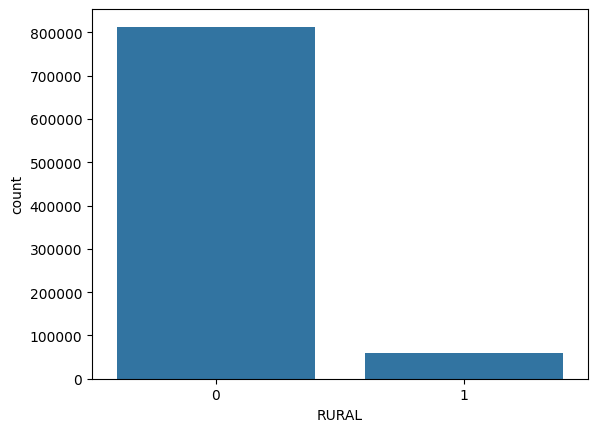

In [10]:
sns.countplot(x='RURAL', data=df)

In [11]:
df['RURAL'].value_counts()

RURAL
0    813050
1     59625
Name: count, dtype: int64

<Axes: xlabel='TIPO_ENSE', ylabel='count'>

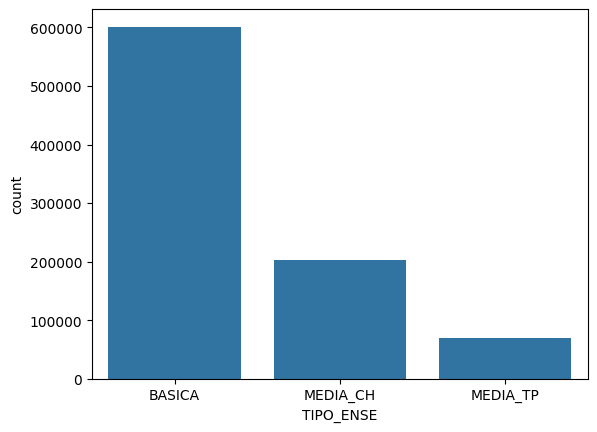

In [12]:
sns.countplot(x='TIPO_ENSE', data=df)

In [13]:
df['TIPO_ENSE'].value_counts()

TIPO_ENSE
BASICA      601292
MEDIA_CH    202196
MEDIA_TP     69187
Name: count, dtype: int64

In [14]:
df['SITUACION_FINAL'].value_counts()

SITUACION_FINAL
P    854581
R     18076
          9
Y         5
T         4
Name: count, dtype: int64

In [15]:
df = df[df['SITUACION_FINAL'].isin(["P", "R"])]
df['SITUACION_FINAL'] = df['SITUACION_FINAL'].isin(["P"])

<ipython-input-15-a7bd968c7ba7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SITUACION_FINAL'] = df['SITUACION_FINAL'].isin(["P"])


In [16]:
df['SITUACION_FINAL'].value_counts()

SITUACION_FINAL
True     854581
False     18076
Name: count, dtype: int64

In [17]:
pd.pivot_table(df, values='PROM_GRAL', index=['REGION'])

<ipython-input-17-241e6146bdc3>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='PROM_GRAL', index=['REGION'])


PROM_GRAL
REGION           
1        5.980358
2        5.975100
3        6.015695
4        6.042344
5        6.049786
6        6.012002
7        6.039815
8        6.115993
9        6.028046
10       5.991854
11       5.999628
12       6.161934
13       5.976677
14       6.019374
15       6.067149
16       6.134018

In [18]:
pd.pivot_table(df, values='PROM_GRAL', index=['TIPO_ENSE'])

<ipython-input-18-506c76aa77a3>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='PROM_GRAL', index=['TIPO_ENSE'])


PROM_GRAL
TIPO_ENSE           
BASICA      6.120299
MEDIA_CH    5.851667
MEDIA_TP    5.538754

In [19]:
pd.pivot_table(df, values='PROM_GRAL', index=['RURAL', 'TIPO_ENSE'])

<ipython-input-19-080c3c938e59>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='PROM_GRAL', index=['RURAL', 'TIPO_ENSE'])


PROM_GRAL
RURAL TIPO_ENSE           
0     BASICA      6.120999
      MEDIA_CH    5.855210
      MEDIA_TP    5.536870
1     BASICA      6.112835
      MEDIA_CH    5.671787
      MEDIA_TP    5.568171

In [20]:
pd.pivot_table(df, values='ASISTENCIA', index=['SITUACION_FINAL'])

ASISTENCIA
SITUACION_FINAL            
False             62.558088
True              89.120711

In [29]:
sns.histplot(data=df, x='ASISTENCIA', hue='SITUACION_FINAL', bins=20)

<Axes: xlabel='ASISTENCIA', ylabel='Count'>

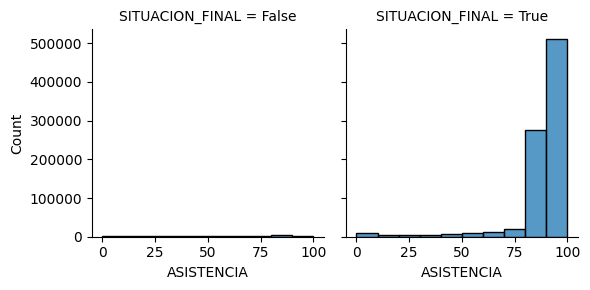

In [32]:
g = sns.FacetGrid(df, col='SITUACION_FINAL')
g.map(sns.histplot, 'ASISTENCIA', bins=10)
plt.show()

In [ ]:
# https://www.geeksforgeeks.org/encoding-categorical-data-in-sklearn/#4-binary-encoding